# modified: 2022.04.26

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import importlib

In [2]:
max_size = 65
max_size = 39
shots = 8192
num_try = 8
print("max_size:", max_size)
print("shots:", shots)
print("num_try:", num_try)

max_size: 39
shots: 8192
num_try: 8


In [3]:
with open("./pkls/raw/fidelity_info.pkl", "rb") as f:
    raw_fidelity_info = pickle.load(f)
with open("./pkls/lnp/fidelity_info.pkl", "rb") as f:
    lnp_fidelity_info = pickle.load(f)
with open("./pkls/delta/fidelity_info.pkl", "rb") as f:
    delta_fidelity_info = pickle.load(f)
with open("./pkls/delta_alter/fidelity_info_alter.pkl", "rb") as f:
    delta_alter_fidelity_info = pickle.load(f)
with open("./pkls/ignis_uno/fidelity_info.pkl", "rb") as f:
    ignis_fidelity_info = pickle.load(f)
# with open("./pkls/mooney01/fidelity_info.pkl", "rb") as f:
#     mooney01_fidelity_info = pickle.load(f)
with open("./pkls/mooney001/fidelity_info.pkl", "rb") as f:
    mooney001_fidelity_info = pickle.load(f)
with open("./pkls/mthree_lu/fidelity_info.pkl", "rb") as f:
    mthree_lu_fidelity_info = pickle.load(f)

In [4]:
raw_fidelities_list = raw_fidelity_info["fidelities_list"]
raw_S_phis_list_list = raw_fidelity_info["S_phis_list_list"]
raw_fidelities_mean_list = np.asarray([np.mean(raw_fidelities["fidelities"]) for raw_fidelities in raw_fidelities_list])
raw_fidelities_stddev_list = np.asarray([np.std(raw_fidelities["fidelities"]) for raw_fidelities in raw_fidelities_list])

In [5]:
ignis_fidelities_list = ignis_fidelity_info["fidelities_list"]
ignis_S_phis_list_list = ignis_fidelity_info["S_phis_list_list"]
ignis_fidelities_mean_list = np.asarray([np.mean(ignis_fidelities["fidelities"]) for ignis_fidelities in ignis_fidelities_list])
ignis_fidelities_stddev_list = np.asarray([np.std(ignis_fidelities["fidelities"]) for ignis_fidelities in ignis_fidelities_list])

In [6]:
delta_fidelities_list = delta_fidelity_info["fidelities_list"]
delta_S_phis_list_list = delta_fidelity_info["S_phis_list_list"]
delta_fidelities_mean_list = np.asarray([np.mean(delta_fidelities["fidelities"]) for delta_fidelities in delta_fidelities_list])
delta_fidelities_stddev_list = np.asarray([np.std(delta_fidelities["fidelities"]) for delta_fidelities in delta_fidelities_list])

In [7]:
delta_alter_fidelities_list = delta_alter_fidelity_info["fidelities_list"]
delta_alter_S_phis_list_list = delta_alter_fidelity_info["S_phis_list_list"]
delta_alter_fidelities_mean_list = np.asarray([np.mean(delta_alter_fidelities["fidelities"]) for delta_alter_fidelities in delta_alter_fidelities_list])
delta_alter_fidelities_stddev_list = np.asarray([np.std(delta_alter_fidelities["fidelities"]) for delta_alter_fidelities in delta_alter_fidelities_list])

In [8]:
lnp_fidelities_list = lnp_fidelity_info["fidelities_list"]
lnp_S_phis_list_list = lnp_fidelity_info["S_phis_list_list"]
lnp_fidelities_mean_list = np.asarray([np.mean(lnp_fidelities["fidelities"]) for lnp_fidelities in lnp_fidelities_list])
lnp_fidelities_stddev_list = np.asarray([np.std(lnp_fidelities["fidelities"]) for lnp_fidelities in lnp_fidelities_list])

In [9]:
mooney001_fidelities_list = mooney001_fidelity_info["fidelities_list"]
mooney001_S_phis_list_list = mooney001_fidelity_info["S_phis_list_list"]
mooney001_fidelities_mean_list = np.asarray([np.mean(mooney001_fidelities["fidelities"]) for mooney001_fidelities in mooney001_fidelities_list])
mooney001_fidelities_stddev_list = np.asarray([np.std(mooney001_fidelities["fidelities"]) for mooney001_fidelities in mooney001_fidelities_list])

In [10]:
mthree_lu_fidelities_list = mthree_lu_fidelity_info["fidelities_list"]
mthree_lu_S_phis_list_list = mthree_lu_fidelity_info["S_phis_list_list"]
mthree_lu_fidelities_mean_list = np.asarray([np.mean(mthree_lu_fidelities["fidelities"]) for mthree_lu_fidelities in mthree_lu_fidelities_list])
mthree_lu_fidelities_stddev_list = np.asarray([np.std(mthree_lu_fidelities["fidelities"]) for mthree_lu_fidelities in mthree_lu_fidelities_list])

In [11]:
ignis_size = len(ignis_fidelities_list)
mthree_lu_size = len(mthree_lu_fidelities_list)

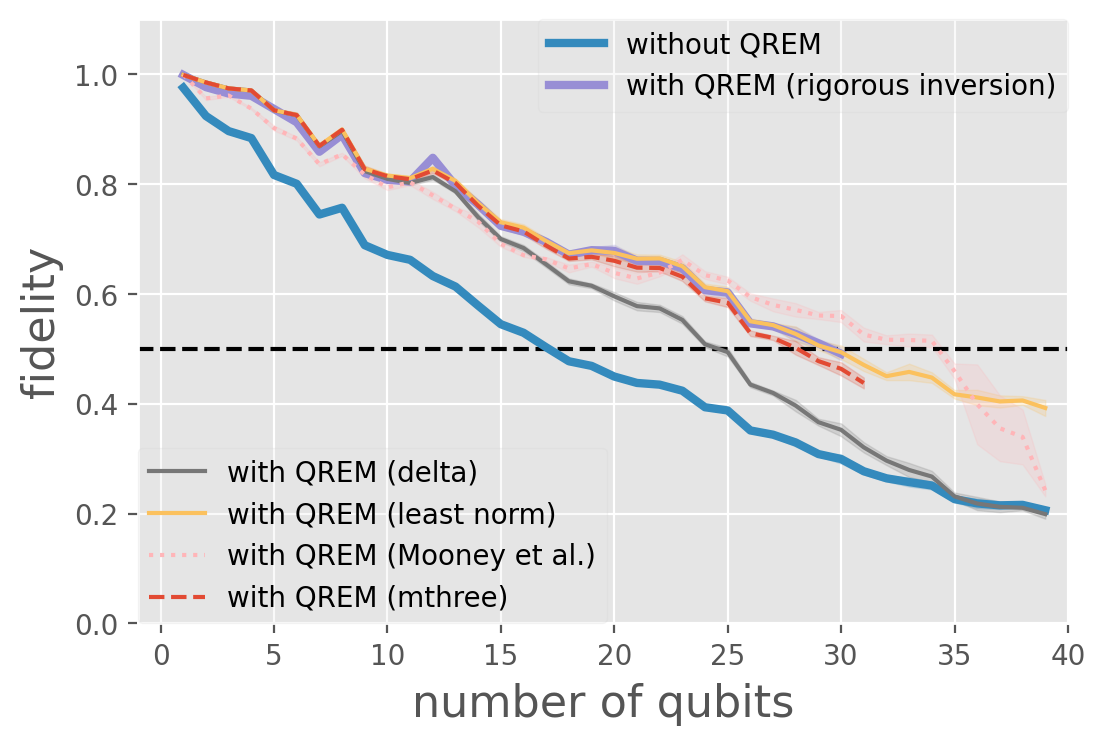

In [32]:
plt.style.use("ggplot")
plt.figure(dpi=200)
plt.plot([-1, max_size + 1], [0.5, 0.5], linestyle="--", color="Black")
p0, = plt.plot(range(1, max_size + 1), raw_fidelities_mean_list, label="without QREM", color="C1", lw=3)
plt.fill_between(range(1, max_size + 1), raw_fidelities_mean_list - raw_fidelities_stddev_list, raw_fidelities_mean_list + raw_fidelities_stddev_list, alpha=0.2, color="C1")
p1, = plt.plot(range(1, ignis_size + 1), ignis_fidelities_mean_list, label="with QREM (rigorous inversion)", color="C2", lw=3)
plt.fill_between(range(1, ignis_size + 1), ignis_fidelities_mean_list - ignis_fidelities_stddev_list, ignis_fidelities_mean_list + ignis_fidelities_stddev_list, alpha=0.2, color="C2")
p2, = plt.plot(range(1, max_size + 1), delta_fidelities_mean_list, label="with QREM (delta)", color="C3")
plt.fill_between(range(1, max_size + 1), delta_fidelities_mean_list - delta_fidelities_stddev_list, delta_fidelities_mean_list + delta_fidelities_stddev_list, alpha=0.2, color="C3")
p3, = plt.plot(range(1, max_size + 1), lnp_fidelities_mean_list, label="with QREM (least norm)", color="C4")
plt.fill_between(range(1, max_size + 1), lnp_fidelities_mean_list - lnp_fidelities_stddev_list, lnp_fidelities_mean_list + lnp_fidelities_stddev_list, alpha=0.2, color="C4")
p4, = plt.plot(range(1, max_size + 1), mooney001_fidelities_mean_list, label="with QREM (Mooney et al.)", color="C6", linestyle="dotted")
plt.fill_between(range(1, max_size + 1), mooney001_fidelities_mean_list - mooney001_fidelities_stddev_list, mooney001_fidelities_mean_list + mooney001_fidelities_stddev_list, alpha=0.2, color="C6")
p5, = plt.plot(range(1, mthree_lu_size + 1), mthree_lu_fidelities_mean_list, label="with QREM (mthree)", color="C7", linestyle="dashed")
plt.fill_between(range(1, mthree_lu_size + 1), mthree_lu_fidelities_mean_list - mthree_lu_fidelities_stddev_list, mthree_lu_fidelities_mean_list + mthree_lu_fidelities_stddev_list, alpha=0.2, color="C7")
plt.xlabel("number of qubits", fontsize=16)
plt.ylabel("fidelity", fontsize=16)
plt.xlim(-1, max_size + 1)
plt.ylim(0, 1.1)
# plt.title("fidelity of GHZ states on ibmq_brooklyn")
l1 = plt.legend([p0,p1], ["without QREM", "with QREM (rigorous inversion)"], loc=1, borderaxespad=0, framealpha= 0.2, fontsize=10)
l2 = plt.legend([p2,p3,p4,p5], ["with QREM (delta)", "with QREM (least norm)", "with QREM (Mooney et al.)", "with QREM (mthree)"], loc=3, borderaxespad=0, framealpha= 0.2, fontsize=10)
plt.gca().add_artist(l1)
# plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, framealpha= 0.2, fontsize=10)

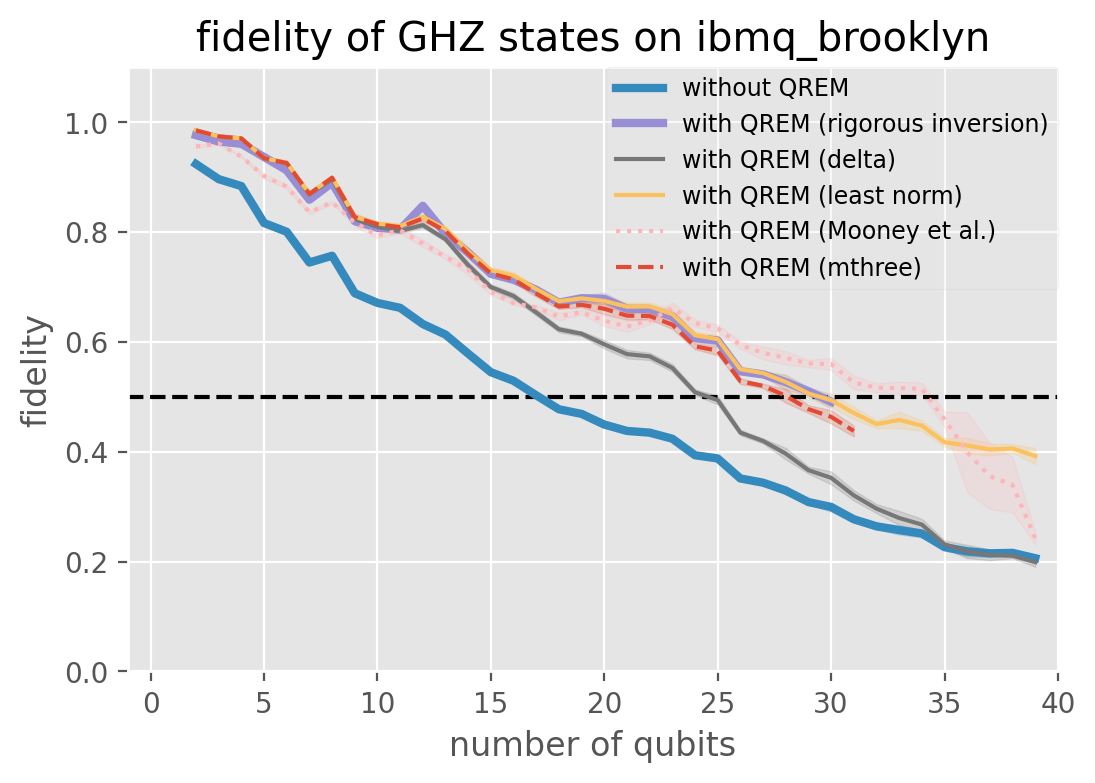

In [14]:
plt.style.use("ggplot")
plt.figure(dpi=200)
plt.plot([-1, max_size + 1], [0.5, 0.5], linestyle="--", color="Black")
plt.plot(range(2, max_size + 1), raw_fidelities_mean_list[1:], label="without QREM", color="C1", lw=3)
plt.fill_between(range(2, max_size + 1), raw_fidelities_mean_list[1:] - raw_fidelities_stddev_list[1:], raw_fidelities_mean_list[1:] + raw_fidelities_stddev_list[1:], alpha=0.2, color="C1")
plt.plot(range(2, ignis_size + 1), ignis_fidelities_mean_list[1:], label="with QREM (rigorous inversion)", color="C2", lw=3)
plt.fill_between(range(2, ignis_size + 1), ignis_fidelities_mean_list[1:] - ignis_fidelities_stddev_list[1:], ignis_fidelities_mean_list[1:] + ignis_fidelities_stddev_list[1:], alpha=0.2, color="C2")
plt.plot(range(2, max_size + 1), delta_fidelities_mean_list[1:], label="with QREM (delta)", color="C3")
plt.fill_between(range(2, max_size + 1), delta_fidelities_mean_list[1:] - delta_fidelities_stddev_list[1:], delta_fidelities_mean_list[1:] + delta_fidelities_stddev_list[1:], alpha=0.2, color="C3")
plt.plot(range(2, max_size + 1), lnp_fidelities_mean_list[1:], label="with QREM (least norm)", color="C4")
plt.fill_between(range(2, max_size + 1), lnp_fidelities_mean_list[1:] - lnp_fidelities_stddev_list[1:], lnp_fidelities_mean_list[1:] + lnp_fidelities_stddev_list[1:], alpha=0.2, color="C4")
plt.plot(range(2, max_size + 1), mooney001_fidelities_mean_list[1:], label="with QREM (Mooney et al.)", color="C6", linestyle="dotted")
plt.fill_between(range(2, max_size + 1), mooney001_fidelities_mean_list[1:] - mooney001_fidelities_stddev_list[1:], mooney001_fidelities_mean_list[1:] + mooney001_fidelities_stddev_list[1:], alpha=0.2, color="C6")
plt.plot(range(2, mthree_lu_size + 1), mthree_lu_fidelities_mean_list[1:], label="with QREM (mthree)", color="C7", linestyle="dashed")
plt.fill_between(range(2, mthree_lu_size + 1), mthree_lu_fidelities_mean_list[1:] - mthree_lu_fidelities_stddev_list[1:], mthree_lu_fidelities_mean_list[1:] + mthree_lu_fidelities_stddev_list[1:], alpha=0.2, color="C7")
plt.xlabel("number of qubits")
plt.ylabel("fidelity")
plt.xlim(-1, max_size + 1)
plt.ylim(0, 1.1)
plt.title("fidelity of GHZ states on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, framealpha= 0.2, fontsize=8.5)

In [13]:
for mean, stddev in zip(raw_fidelities_mean_list[26:32], raw_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.344 \pm 0.00387$
$0.33 \pm 0.00729$
$0.308 \pm 0.00386$
$0.299 \pm 0.00828$
$0.277 \pm 0.00586$
$0.264 \pm 0.00567$


In [14]:
for mean, stddev in zip(ignis_fidelities_mean_list[26:32], ignis_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.541 \pm 0.00466$
$0.527 \pm 0.0132$
$0.51 \pm 0.00771$
$0.491 \pm 0.0123$


In [15]:
for mean, stddev in zip(delta_fidelities_mean_list[26:32], delta_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.42 \pm 0.00449$
$0.397 \pm 0.0104$
$0.367 \pm 0.00627$
$0.353 \pm 0.0117$
$0.321 \pm 0.00937$
$0.297 \pm 0.00821$


In [16]:
for mean, stddev in zip(lnp_fidelities_mean_list[26:32], lnp_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.543 \pm 0.00444$
$0.527 \pm 0.0135$
$0.506 \pm 0.00815$
$0.494 \pm 0.0124$
$0.471 \pm 0.0112$
$0.45 \pm 0.00717$


In [17]:
for mean, stddev in zip(mooney001_fidelities_mean_list[26:32], mooney001_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.58 \pm 0.0117$
$0.571 \pm 0.0122$
$0.561 \pm 0.00653$
$0.56 \pm 0.011$
$0.526 \pm 0.0125$
$0.517 \pm 0.00803$


In [18]:
for mean, stddev in zip(mthree_lu_fidelities_mean_list[26:32], mthree_lu_fidelities_stddev_list[26:32]):
    print("${:.3g} \\pm {:.3g}$".format(mean, stddev))

$0.52 \pm 0.00391$
$0.502 \pm 0.0124$
$0.478 \pm 0.00705$
$0.464 \pm 0.012$
$0.438 \pm 0.00988$


In [26]:
raw_S_phis_mean_list = [np.mean(np.asarray(raw_S_phis_list), axis=0) for raw_S_phis_list in raw_S_phis_list_list]
raw_S_phis_stddev_list = [np.std(np.asarray(raw_S_phis_list), axis=0) for raw_S_phis_list in raw_S_phis_list_list]

In [27]:
lnp_S_phis_mean_list = [np.mean(np.asarray(lnp_S_phis_list), axis=0) for lnp_S_phis_list in lnp_S_phis_list_list]
lnp_S_phis_stddev_list = [np.std(np.asarray(lnp_S_phis_list), axis=0) for lnp_S_phis_list in lnp_S_phis_list_list]

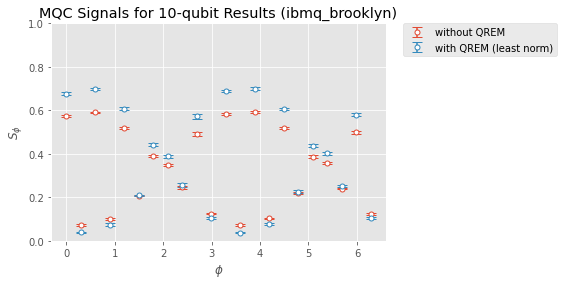

In [39]:
n = 10
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

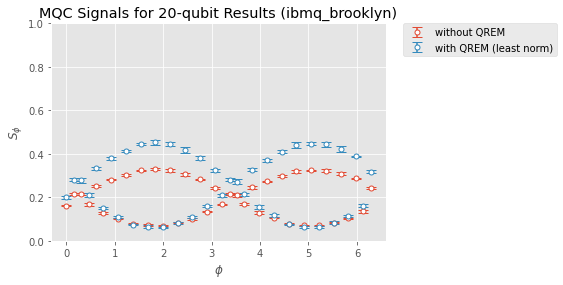

In [41]:
n = 20
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

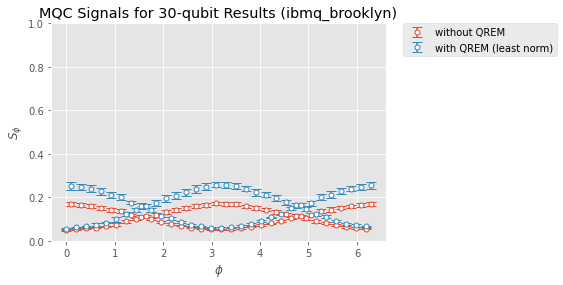

In [40]:
n = 30
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

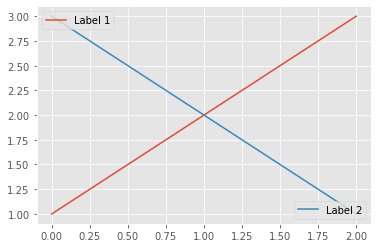

In [26]:
p1, = plt.plot([1,2,3], label="test1")
p2, = plt.plot([3,2,1], label="test2")

l1 = plt.legend([p1], ["Label 1"], loc=2)
l2 = plt.legend([p2], ["Label 2"], loc=4) # this removes l1 from the axes.
plt.gca().add_artist(l1) # add l1 as a separate artist to the axes